# Proyecto 3

 [Presentación](https://acortar.link/Nro7os)

Obtener un dataset con las valoraciones de Bitcoin de los últimos 365 días.

Con lo que vimos ayer en la clase de API, intenta conseguir ese dataset.  

Graficar.

In [1]:
#Importación de librerías necesarias:
import pandas as pd
import csv
import requests
import ast
import matplotlib
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [2]:
# 1.- Consumir la API http://numbersapi.com/1..10
ct = str(int(datetime.datetime.now().timestamp()))
c2 = datetime.datetime.now() - datetime.timedelta(days=365*10)
ct2 = str(int(c2.timestamp()))

APIurl = "https://api.binance.com/api/v3/klines?symbol=BTCUSDT&interval=3d&limit=1000&startTime="+ct2+"000&endTime="+ct+"000"
APIresp = requests.get(APIurl)
print(APIresp.ok)
print(APIresp.status_code)
print(APIresp.elapsed)
x = ast.literal_eval(APIresp.text)
df = pd.DataFrame(x)
df = df.drop(df.columns[[0,1,2,3,5,7,8,9,10,11]], axis='columns')
df.rename( columns={4 :'Close price'}, inplace=True)
df.rename( columns={6 :'Fecha'}, inplace=True)
df['Close price'] = pd.to_numeric(df['Close price'])

True
200
0:00:00.877020


In [3]:
from datetime import datetime
listaDate = []
for date in df['Fecha']:
    listaDate.append(datetime.fromtimestamp(date//1000))
df.index = listaDate

<function matplotlib.pyplot.show(*args, **kw)>

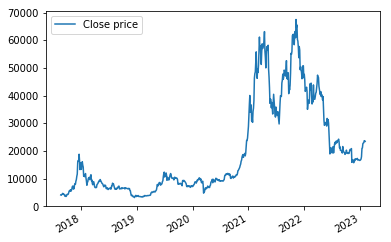

In [4]:
# Debo convertir antes al formato datetime para que lo reconozca como índice timestamp
df.plot(kind='line', y='Close price')
plt.show

In [5]:
semestral = df.groupby(np.arange(len(df))//6).mean()

In [7]:
semestral["dif"] = semestral.cambio.diff()

AttributeError: 'DataFrame' object has no attribute 'cambio'

In [ ]:
semestral["variacion"] = semestral.dif/semestral.cambio.shift(1)*100